In [1]:
import numpy as np
import pandas as pd
import aquire, prepare
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


from wordcloud import WordCloud

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/xaviercarter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('spam_clean.csv')

In [3]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
#prep data for exploration
df['tidy_text'] = df.text.apply(prepare.basic_clean)

In [53]:
#value counts
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [54]:
ham_words =  " ".join(df[df.label == 'ham'].tidy_text)

In [55]:
spam_words =  " ".join(df[df.label == 'spam'].tidy_text)

In [56]:
all_words = ' '.join(df.tidy_text)

In [57]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [58]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']

In [59]:
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [60]:
bigrams = nltk.ngrams(ham_words.split(), 2)

In [61]:
top_20_bigrams_ham = pd.Series(nltk.ngrams(ham_words.split(), 2)).value_counts().head(20)

In [62]:
top_20_bigrams_spam = pd.Series(nltk.ngrams(spam_words.split(),2)).value_counts().head(20)

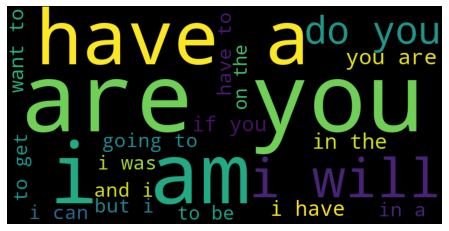

In [63]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_ham.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

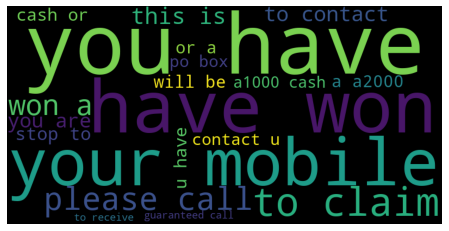

In [64]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams_spam.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [72]:
common_list = []
for i in pd.Series(nltk.ngrams(ham_words.split(), 2)).value_counts().head(20).index:
    for j in pd.Series(nltk.ngrams(spam_words.split(), 2)).value_counts().head(20).index:
        if j == i:
            common_list.append(i)

In [73]:
common_list

[('you', 'are')]

In [74]:
#common in the top 20

In [81]:
#trigrams
top_20_trigrams_ham = pd.Series(nltk.ngrams(ham_words.split(), 3)).value_counts().head(20)
top_20_trigrams_spam = pd.Series(nltk.ngrams(spam_words.split(),3)).value_counts().head(20)

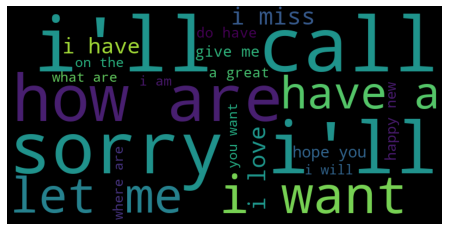

In [82]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_trigrams_ham.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

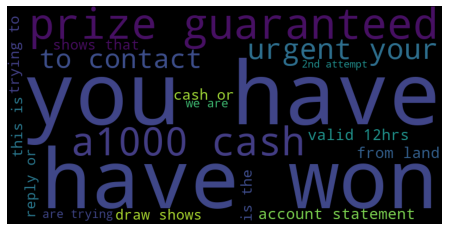

In [83]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_trigrams_spam.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8,4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [84]:
common_list = []
for i in pd.Series(nltk.ngrams(ham_words.split(), 3)).value_counts().head(20).index:
    for j in pd.Series(nltk.ngrams(spam_words.split(), 3)).value_counts().head(20).index:
        if j == i:
            common_list.append(i)

In [85]:
common_list

[]

In [86]:
#no common words

In [87]:
#Blog Articles

In [92]:
blog_df = aquire.get_blog_articles(['business','sports','world','technology', 'entertainment'])

In [93]:
blog_df = pd.DataFrame(blog_df)

In [97]:
blog_df.head()

,Title,Content,Category,tidy_text
0,"Reliance Industries vaccinates 98% of workers,...",Reliance Industries has said in a statement th...,business,reliance industry ha said statement 98 worker ...
1,I will most likely not be on future earnings c...,Tesla CEO and the world's second-richest perso...,business,tesla ceo world ' secondrichest person elon mu...
2,Speculation around our plans for crypto not tr...,Amazon on Monday denied speculations that it w...,business,amazon monday denied speculation wa looking ac...
3,"Musk criticises Apple's 'walled garden', cobal...",Tesla's billionaire CEO Elon Musk criticised A...,business,tesla ' billionaire ceo elon musk criticised a...
4,Factually incorrect: INOX on report of Amazon ...,INOX Leisure denied a report that claimed Amaz...,business,inox leisure denied report claimed amazon indi...


In [168]:
blog_df['tidy_text'] = blog_df.Content.apply(prepare.basic_clean)
blog_df['tidy_text'] = blog_df.tidy_text.apply(prepare.adjust_stopwords)

In [169]:
blog_df.head()

,Title,Content,Category,tidy_text
0,"Reliance Industries vaccinates 98% of workers,...",Reliance Industries has said in a statement th...,business,reliance industries said statement 98 workers ...
1,I will most likely not be on future earnings c...,Tesla CEO and the world's second-richest perso...,business,tesla ceo world's secondrichest person elon mu...
2,Speculation around our plans for crypto not tr...,Amazon on Monday denied speculations that it w...,business,amazon monday denied speculations looking acce...
3,"Musk criticises Apple's 'walled garden', cobal...",Tesla's billionaire CEO Elon Musk criticised A...,business,tesla's billionaire ceo elon musk criticised a...
4,Factually incorrect: INOX on report of Amazon ...,INOX Leisure denied a report that claimed Amaz...,business,inox leisure denied report claimed amazon indi...


In [170]:
blog_df.Category.value_counts()

world            25
entertainment    25
business         25
technology       24
sports           24
Name: Category, dtype: int64

In [171]:
business_words =  " ".join(blog_df[blog_df.Category == 'business'].tidy_text)
entertainment_words =  " ".join(blog_df[blog_df.Category == 'entertainment'].tidy_text)
world_words =  " ".join(blog_df[blog_df.Category == 'world'].tidy_text)
technology_words =  " ".join(blog_df[blog_df.Category == 'technology'].tidy_text)
sports_words =  " ".join(blog_df[blog_df.Category == 'sports'].tidy_text)
all_words = ' '.join(blog_df.tidy_text)

In [172]:
#Frequency Table
b_freq = pd.Series(business_words.split()).value_counts()
e_freq = pd.Series(entertainment_words.split()).value_counts()
w_freq = pd.Series(world_words.split()).value_counts()
t_freq = pd.Series(technology_words.split()).value_counts()
s_freq = pd.Series(sports_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [173]:
word_table = pd.concat([all_freq, s_freq, t_freq, w_freq, e_freq,b_freq], axis=1, sort=True).fillna(0).astype(int)

In [174]:
word_table.columns = ['all','sports','technology','world','entertainment','business']

In [176]:
word_table.sort_values('sports', ascending=False).head(30)

,all,sports,technology,world,entertainment,business
olympics,22,19,1,2,0,0
tokyo,18,15,1,2,0,0
said,90,13,15,27,16,19
added,37,10,3,7,9,8
women's,11,10,0,0,0,1
match,8,8,0,0,0,0
india,28,8,1,4,3,12
team,9,8,0,0,1,0
medals,8,8,0,0,0,0
first,15,8,1,2,2,2
